In [1]:
import sys
from pathlib import Path

# Find project root by looking for .git or requirements.txt
current = Path.cwd()
while not any((current / marker).exists() for marker in ['.git', 'requirements.txt']):
    if current.parent == current:
        raise FileNotFoundError("Project root not found")
    current = current.parent

sys.path.append(str(current))
print(f"Added project root: {current}")

Added project root: /notebooks


In [2]:
import torch
import torchvision
from datasets import get_dataset, get_dataloaders
import matplotlib.pyplot as plt
import random  # Ensure random is imported
import numpy as np
from torch.utils.data import DataLoader

# Helper Functions

In [10]:
def visualize_sample(dataset, sample_index):
    """
    Visualize a single sample from the dataset along with its metadata.
    
    Args:
        dataset: The dataset object
        sample_index: Index of the sample to visualize
    """
    sample_image, sample_latent = dataset[sample_index]
    plt.figure(figsize=(4, 4))
    plt.imshow(sample_image.permute(1, 2, 0))
    plt.title(f'Sample #{sample_index}')
    plt.axis('off')
    plt.show()
    
    print('Shape of image:', sample_image.shape)
    print('latent values:', sample_latent)
    print('latent values:(shape)', sample_latent.shape)

def visualize_grid(dataset, n=4, grid_color='white'):
    """
    Create a grid of random samples from the dataset.
    
    Args:
        dataset: The dataset object
        n: Grid size (n x n)
        grid_color: Color of the space between subplots (background). Default is 'white'.
    """
    indices = random.sample(range(len(dataset)), n * n)  # Random indices without replacement
    fig, axes = plt.subplots(n, n, figsize=(5, 5))
    fig.patch.set_facecolor(grid_color)  # Set figure background color
    for i in range(n):
        for j in range(n):
            idx = indices[i * n + j]
            axes[i, j].imshow(dataset[idx][0].permute(1, 2, 0))
            axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()
    return indices  # Return the indices used in case they're needed later

# Dsprites

In [4]:
Dsprites = get_dataset('dsprites')
# dsprites = Dsprites(selected_factors=['color','shape', 'scale', 'orientation'], not_selected_factors_index_value={'posX': 0, 'posY': 0})
# dsprites = Dsprites(selected_factors=['shape', 'posX', 'posY'], not_selected_factors_index_value={'scale': 0, 'orientation': 0})
dsprites = Dsprites(selected_factors='all', not_selected_factors_index_value=None)

In [20]:
index = 400000
print(dsprites[index])
print(dsprites[index][0].shape)
print(dsprites[index][1].shape)

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), array([2.        , 0.8       , 4.83321947, 0.64516129, 0.        ]))
torch.Size([1, 64, 64])
(5,)


In [ ]:
len(dsprites)

3072

In [7]:
dsprites_dataloader = DataLoader(dsprites, batch_size=64, shuffle=True)
for batch in dsprites_dataloader:
    images, latents = batch
    print('Batch shape:', images.shape)
    print('Latents shape:', latents.shape)
    break

Batch shape: torch.Size([64, 1, 64, 64])
Latents shape: torch.Size([64, 3])


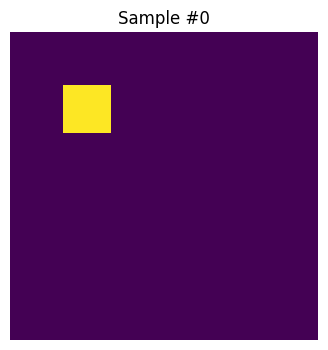

Shape of image: torch.Size([1, 64, 64])
latent values: [1. 0. 0.]
latent values:(shape) (3,)


In [8]:
sample_index = 0
visualize_sample(dsprites, sample_index)

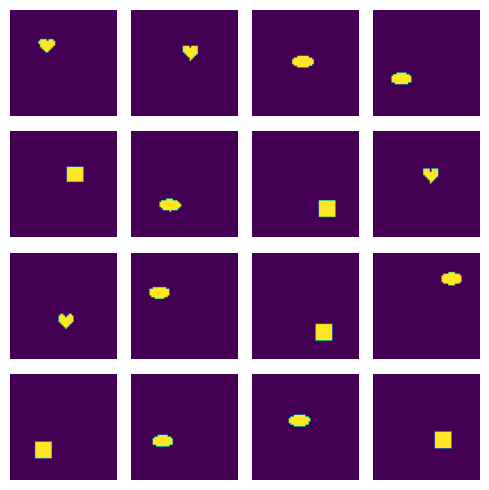

[2246,
 2666,
 1487,
 1081,
 714,
 1276,
 926,
 2635,
 2617,
 1064,
 863,
 1984,
 157,
 1144,
 1420,
 823]

In [9]:
n = 4  # Define the grid size (n x n)
visualize_grid(dsprites, n)

# Shape3D

In [10]:
Shapes3D = get_dataset('shapes3d')
# shapes3d = Shapes3D(selected_factors='all', not_selected_factors_index_value=None)
shapes3d = Shapes3D(selected_factors=['floorCol', 'wallCol', 'objCol', 'objSize', 'objType'], not_selected_factors_index_value={'objAzimuth':4})

In [11]:
shapes3d[1]

(tensor([[[0.6000, 0.6000, 0.6000,  ..., 0.6000, 0.6000, 0.6000],
          [0.6000, 0.6000, 0.6000,  ..., 0.6000, 0.6000, 0.6000],
          [0.6000, 0.6000, 0.6000,  ..., 0.6000, 0.6000, 0.6000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 0.8627, 0.8745, 0.8824],
          [1.0000, 1.0000, 1.0000,  ..., 0.8863, 0.9059, 0.8980],
          [1.0000, 1.0000, 1.0000,  ..., 0.8706, 0.8784, 0.8941]],
 
         [[0.8863, 0.8863, 0.8863,  ..., 0.8863, 0.8863, 0.8863],
          [0.8863, 0.8863, 0.8863,  ..., 0.8863, 0.8863, 0.8863],
          [0.8863, 0.8863, 0.8863,  ..., 0.8863, 0.8863, 0.8863],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.9765, 0.9765, 0.9765,  ..., 0.9765, 0.9765, 0.9765],
          [0.9765, 0.9765, 0.9765,  ..., 0.9765, 0.9765, 0.9765],
          [0.9765, 0.9765, 0.9765,  ...,

In [12]:
shapes3d_dataloader = DataLoader(shapes3d, batch_size=64, shuffle=True)
for batch in shapes3d_dataloader:
    images, latents = batch
    print('Batch shape:', images.shape)
    print('Latents shape:', latents.shape)
    break

Batch shape: torch.Size([64, 3, 64, 64])
Latents shape: torch.Size([64, 5])


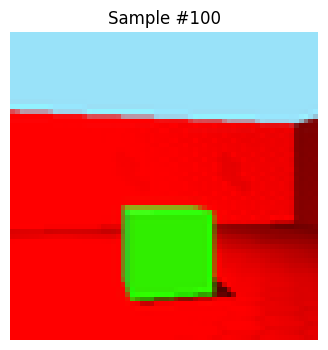

Shape of image: torch.Size([3, 64, 64])
latent values: [0.         0.         0.3        0.82142857 0.        ]
latent values:(shape) (5,)


In [13]:
sample_index = 100
visualize_sample(shapes3d, sample_index)

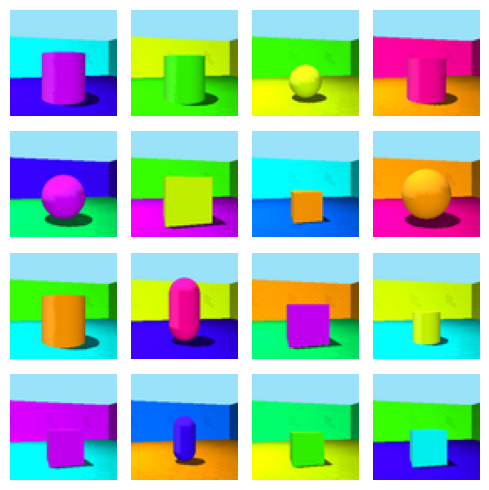

[24285,
 10361,
 7430,
 6389,
 15318,
 26652,
 20836,
 29182,
 17021,
 23347,
 13396,
 16709,
 18828,
 5347,
 7784,
 23532]

In [14]:
n = 4  # Define the grid size (n x n)
visualize_grid(shapes3d, n)

# Cars3D

In [4]:
Cars3D = get_dataset('cars3d')
cars3d = Cars3D(selected_factors='all', not_selected_factors_index_value=None)
# cars3d = Cars3D(selected_factors=['elevation', 'azimuth'], not_selected_factors_index_value={'object_type': 0})

In [5]:
len(cars3d)

17568

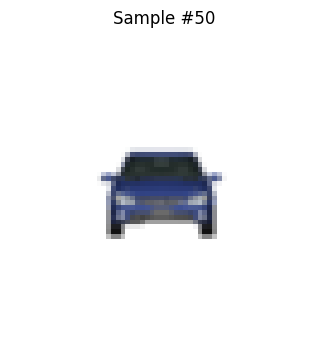

Shape of image: torch.Size([3, 64, 64])
latent values: [0.         0.         0.27472527]
latent values:(shape) (3,)


In [6]:
sample_index = 50
visualize_sample(cars3d, sample_index)

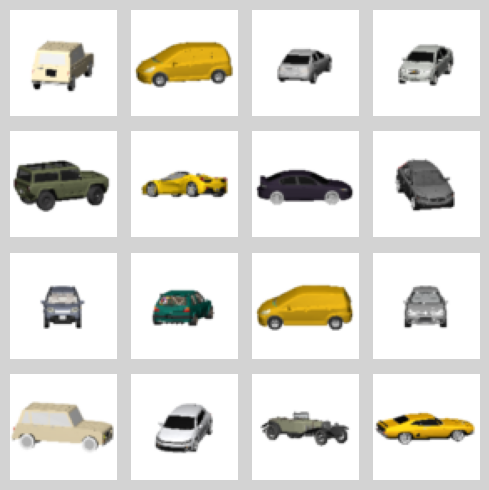

[11303,
 9770,
 11247,
 9056,
 11812,
 1741,
 12084,
 17470,
 4526,
 6910,
 14345,
 4448,
 12401,
 13371,
 8355,
 12002]

In [11]:
n = 4  # Define the grid size (n x n)
visualize_grid(cars3d, n, grid_color='lightgrey')

# CelebA

In [ ]:
CelebA_Class = get_dataset('celeba')
celeba = CelebA_Class(root='data/celeba', subset=0.01)  # Use subset for quick tests; adjust as needed
len(celeba)

In [ ]:
# Inspect one sample (will trigger download if not present)
idx = 0
img, placeholder = celeba[idx]
plt.imshow(img.permute(1,2,0))
plt.axis('off')
print('Image shape:', img.shape, 'Placeholder label:', placeholder)

In [ ]:
# DataLoader example for CelebA
celeba_loader = DataLoader(celeba, batch_size=32, shuffle=True)
images, placeholders = next(iter(celeba_loader))
print('Batch images shape:', images.shape)
print('Placeholders shape:', placeholders.shape)

# Visualize a grid of CelebA samples (reuse visualize_grid)
visualize_grid(celeba, n=4)

**Note:** The first run will download and preprocess (resize) CelebA; this can take several minutes. Adjust `subset` to use more of the dataset (1.0 for full).

# Dataloader

In [19]:
Dsprites = get_dataset('dsprites')
dsprites = Dsprites(selected_factors='all', not_selected_factors_index_value=None)

In [20]:
from torch.utils.data import DataLoader

batch_size = 64
train_loader = DataLoader(dsprites, batch_size=batch_size, shuffle=True)

# Dataloader (optimal num of workers)

In [21]:
from utils.io import find_optimal_num_workers

In [22]:
Shapes3D = get_dataset('shapes3d')
shapes3d = Shapes3D(selected_factors='all', not_selected_factors_index_value=None)

In [23]:
find_optimal_num_workers(shapes3d, batch_size=64, num_batches_to_test=1000, num_warmup_batches=100)

Defaulting max_workers to physical core count: 8
Finding optimal num_workers (testing 0 to 8)...
  num_workers=0: Warming up with 100 batches...
  num_workers=0: Processing 1000 batches...
  num_workers=0: Successfully processed 1000 batches.
  num_workers=0: 0.00601 sec/batch
  num_workers=1: Warming up with 100 batches...
  num_workers=1: Processing 1000 batches...
  num_workers=1: Successfully processed 1000 batches.
  num_workers=1: 0.00480 sec/batch
  num_workers=2: Warming up with 100 batches...
  num_workers=2: Processing 1000 batches...
  num_workers=2: Successfully processed 1000 batches.
  num_workers=2: 0.00268 sec/batch
  num_workers=3: Warming up with 100 batches...
  num_workers=3: Processing 1000 batches...
  num_workers=3: Successfully processed 1000 batches.
  num_workers=3: 0.00236 sec/batch
  num_workers=4: Warming up with 100 batches...
  num_workers=4: Processing 1000 batches...
  num_workers=4: Successfully processed 1000 batches.
  num_workers=4: 0.00261 sec/batc

5

In [24]:
Dsprites = get_dataset('dsprites')
dsprites = Dsprites(selected_factors='all', not_selected_factors_index_value=None)

In [ ]:
find_optimal_num_workers(dsprites, batch_size=64, num_batches_to_test=1000, num_warmup_batches=100)

Defaulting max_workers to physical core count: 8
Finding optimal num_workers (testing 0 to 8)...
  num_workers=0: Warming up with 100 batches...
  num_workers=0: Processing 1000 batches...
  num_workers=0: Successfully processed 1000 batches.
  num_workers=0: 0.00537 sec/batch
  num_workers=1: Warming up with 100 batches...
  num_workers=1: Processing 1000 batches...
  num_workers=1: Successfully processed 1000 batches.
  num_workers=1: 0.00339 sec/batch
  num_workers=2: Warming up with 100 batches...
  num_workers=2: Processing 1000 batches...
  num_workers=2: Successfully processed 1000 batches.
  num_workers=2: 0.00171 sec/batch
  num_workers=3: Warming up with 100 batches...
  num_workers=3: Processing 1000 batches...
  num_workers=3: Successfully processed 1000 batches.
  num_workers=3: 0.00159 sec/batch
  num_workers=4: Warming up with 100 batches...
  num_workers=4: Processing 1000 batches...
  num_workers=4: Successfully processed 1000 batches.
  num_workers=4: 0.00152 sec/batc

5

: 